In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfits


from matplotlib.ticker import NullFormatter  # useful for `logit` scale


from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

In [3]:
def get_lc_path(path):   
    lightcurve=pyfits.open(path)
    #barylc=pyfits.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/RX_J0806/nicer/bary01.lc')
    header=lightcurve[0].header
    tstart=header['tstart']
    #print('originlc:')
    #print(repr(header[:]),'\n')
    obstime=header['DATE-OBS']
    time=lightcurve[1].data['TIME']
    count=lightcurve[1].data['RATE']
    plt.figure(figsize=(int(time[-1]/1000+6),6))
    plt.plot(time,count,'.')
    plt.semilogy()
    plt.xticks(np.arange(0,time[-1]+1000,1000),rotation=30)
    return time,count,obstime,tstart

def get_hardratio_depend_time_count(hardratio,count,time,timemin,timemax,countmin,countmax):
    h=[]
    c=[]
    t=[]
    for index,(h_,c_,t_) in enumerate(zip(hardratio,count,time)):
        if (t_>=timemin and t_<timemax and c_>=countmin and c_<countmax):
            h.append(h_)
            c.append(c_)
            t.append(t_)
    return h,c,t




In [26]:
counttot2[:10],countlow2[:10],counthigh2[:10],countlow2[:10]+counthigh2[:10]

(array([ 222.28030396,  208.20658875,  227.34376526,  237.85577393,
         193.97808838,  159.3127594 ,  272.7310791 ,  422.28390503,
         585.14788818,  518.87194824], dtype=float32),
 array([ 163.97727966,  155.32873535,  178.64712524,  188.05203247,
         145.69050598,  123.15129852,  212.2225647 ,  328.12838745,
         434.63299561,  394.47625732], dtype=float32),
 array([  59.39620972,   52.87786484,   48.69664764,   49.80373764,
          48.56350327,   36.16146851,   60.50851822,   94.50947571,
         150.5149231 ,  126.06542969], dtype=float32),
 array([ 223.37348938,  208.206604  ,  227.34378052,  237.85577393,
         194.25401306,  159.31277466,  272.7310791 ,  422.63787842,
         585.14794922,  520.54168701], dtype=float32))

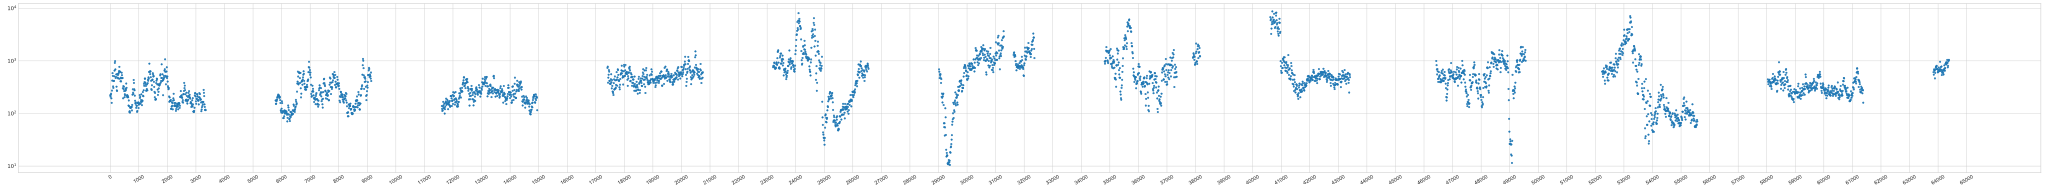

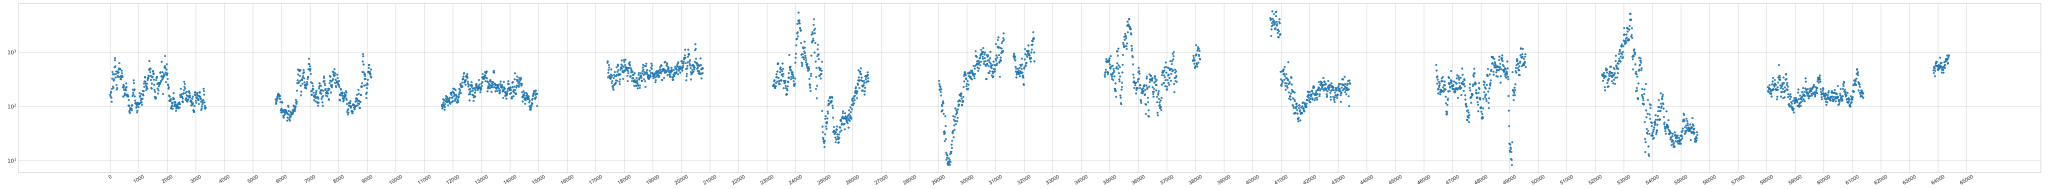

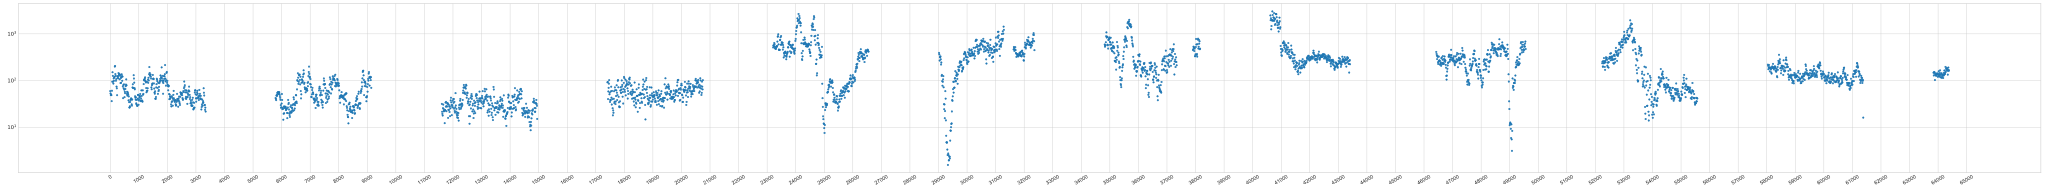

In [4]:
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/nustar_v404/90102007002/grp_pipeline_products_10s/V404cygA01_sr.lc'
timetot2,counttot2,obstimetot2,tstart2=get_lc_path(path)
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/nustar_v404/90102007002/grp_pipeline_products_10s_3_10/V404cygA01_sr.lc'
timelow2,countlow2,obstimelow2,tstart=get_lc_path(path)
path='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/nustar_v404/90102007002/grp_pipeline_products_10s_10_79/V404cygA01_sr.lc'
timehigh2,counthigh2,obstimehigh2,tstart=get_lc_path(path)
hardratiotot2=counthigh2/countlow2

In [ ]:
t=np.arange(100)*10+100
hard=abs(np.sin(t*0.6)/np.sin(t*0.9))
intensity=np.e**(3*np.sin(t*0.6)+2*np.sin(t*0.9))
plt.plot(hard,intensity,'.')

In [ ]:
hardratiopartcount,countratepartcount,timepartcount=get_hardratio_depend_time_count(hard,intensity,t,timemin=min(t),timemax=max(t),countmin=1,countmax=30)
cm=plt.cm.get_cmap('RdYlBu')
plt.subplot(111)
plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,s=np.log(timepartcount)**3,cmap=cm)
plt.colorbar()
plt.xlim(min(hardratiopartcount)-10,max(hardratiopartcount)+10)
plt.ylim(min(countratepartcount)-10,max(countratepartcount)+10)

#plt.yscale('log')
#plt.title('log')
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
#plt.subplots_adjust(top=1, bottom=0.2, left=0.2, right=0.8, hspace=0.25,wspace=0.35)
plt.grid(True,color='grey',linestyle='-.',linewidth=1,alpha=0.1)
plt.tight_layout()
plt.show()
#plt.savefig('/Users/brettlv/Desktop/hidtest.png')

In [5]:
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.ticker as ticker

xmajorLocator   = plt.MultipleLocator(1) #将x主刻度标签设置为10的倍数
xmajorFormatter = plt.FormatStrFormatter('%2.1f') #设置x轴标签文本的格式
xminorLocator   = plt.MultipleLocator(0.5) #将x轴次刻度标签设置为1的倍数
 
ymajorLocator   = plt.MultipleLocator(1) #将y轴主刻度标签设置为10的倍数
ymajorFormatter = plt.FormatStrFormatter('%2.1f') #设置y轴标签文本的格式
yminorLocator   = plt.MultipleLocator(0.5) #将此y轴次刻度标签设置为1的倍数

ax.xaxis.set_major_locator(xmajorLocator)
ax.xaxis.set_major_formatter(xmajorFormatter)
 
ax.yaxis.set_major_locator(ymajorLocator)
ax.yaxis.set_major_formatter(ymajorFormatter)
 
#显示次刻度标签的位置,没有标签文本
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
 
ax.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度
#ax.xaxis.grid(True, which='minor') 
ax.yaxis.grid(True, which='minor') #y坐标轴的网格使用次刻度


NameError: name 'ax' is not defined

In [6]:
def setup(ax):
    #ax.spines['right'].set_color('none')
    #ax.spines['left'].set_color('none')
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.yaxis.set_major_locator(ticker.NullLocator())
    #ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.patch.set_alpha(0.0)

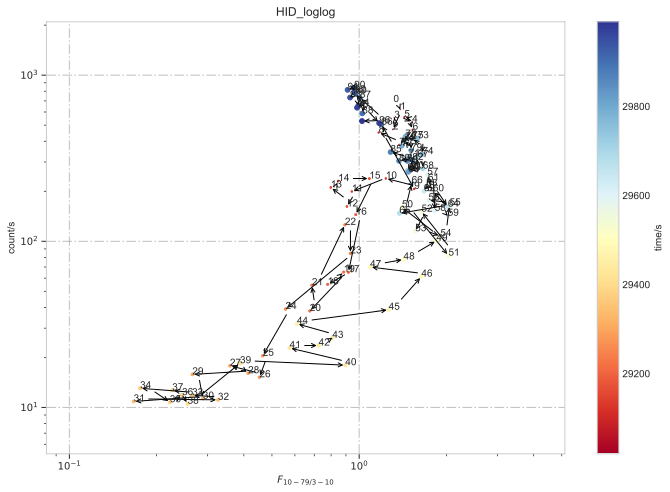

In [8]:
hardratiopartcount,countratepartcount,timepartcount=get_hardratio_depend_time_count(hardratiotot2,counttot2,timetot2,timemin=29000,timemax=30000,countmin=1,countmax=1000)
cm=plt.cm.get_cmap('RdYlBu')
#cm=plt.cm.get_cmap('Greys')
plt.figure(figsize=(10,6))
ax=plt.subplot(111)
setup(ax)

#plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,s=np.arange(len(timepartcount)),linewidths=np.arange(len(timepartcount)),cmap=cm,marker='.')
plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,s=np.arange(len(timepartcount)),cmap=cm,marker='.')

for i,(x_,y_,z_) in enumerate(zip(hardratiopartcount[:-1],countratepartcount[:-1],timepartcount[:-1])):
    #plt.scatter(x_,y_,c=z_,s=i,linewidths=i,cmap=cm,marker='.')
    plt.annotate(i,xy=(hardratiopartcount[i+1],countratepartcount[i+1]),xytext=(x_,y_),arrowprops=dict(arrowstyle="->"))#arrowprops=dict(facecolor='black', shrink=0.05)
plt.xlim(min(hardratiopartcount)*0.5,max(hardratiopartcount)*2.5)
plt.ylim(min(countratepartcount)*0.5,max(countratepartcount)*2.5)
plt.xscale('log')
plt.yscale('log')
#plt.semilogx()
#plt.semilogy()
plt.grid(True,color='grey',linestyle='-.',linewidth=1,alpha=0.5)
plt.title('HID_loglog')
#plt.xticks(np.logspace(min(hardratiopartcount),max(hardratiopartcount),10),rotation=30)
#plt.yticks(np.logspace(min(countratepartcount),max(countratepartcount),10),rotation=30)

#ax.yaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
#ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",fontsize=15, transform=ax.transAxes)
#plt.gca().yaxis.set_major_locator(ticker.LogLocator(10.0,numticks=1))
#plt.gca().xaxis.set_minor_locator(ticker.LogLocator(0.1))
#plt.gca().yaxis.set_minor_locator(ticker.LogLocator(0.1))
plt.tight_layout()
plt.xlabel('$F_{{10-79}/{3-10}}$')
plt.ylabel('count/s')
plt.colorbar(label='time/s')
#plt.text=(x,y,'words')
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.savefig('low_state_HID_less1000.png')
#plt.show()
#plt.grid()
#plt.savefig('/Users/brettlv/Desktop/hid2_10s.png')

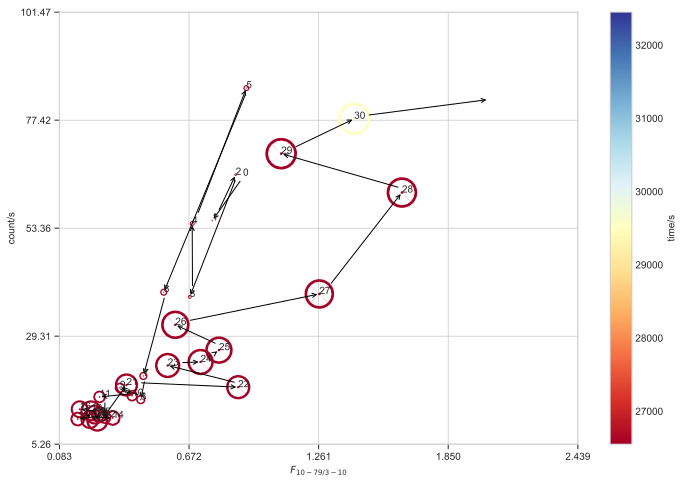

In [12]:
hardratiopartcount,countratepartcount,timepartcount=get_hardratio_depend_time_count(hardratiotot2,counttot2,timetot2,timemin=29000,timemax=30000,countmin=1,countmax=100)
cm=plt.cm.get_cmap('RdYlBu')
#cm=plt.cm.get_cmap('Greys')
plt.figure(figsize=(10,6))
ax=plt.subplot(111)
setup(ax)
for i,(x_,y_,z_) in enumerate(zip(hardratiopartcount[:-1],countratepartcount[:-1],timepartcount[:-1])):
    plt.scatter(x_,y_,c=z_,s=i,linewidths=i,cmap=cm,marker='.')
    plt.annotate(i,xy=(hardratiopartcount[i+1],countratepartcount[i+1]),xytext=(x_,y_),arrowprops=dict(arrowstyle="->",connectionstyle='arc3'))#
ax.xaxis.set_major_locator(ticker.LinearLocator(5))
ax.yaxis.set_major_locator(ticker.LinearLocator(5))
plt.xlim(min(hardratiopartcount)*0.5,max(hardratiopartcount)*1.2)
plt.ylim(min(countratepartcount)*0.5,max(countratepartcount)*1.2)
plt.xlabel('$F_{{10-79}/{3-10}}$')
plt.ylabel('count/s')
plt.colorbar(label='time/s')
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.savefig('low_state_HID_less100.png')

#plt.show()

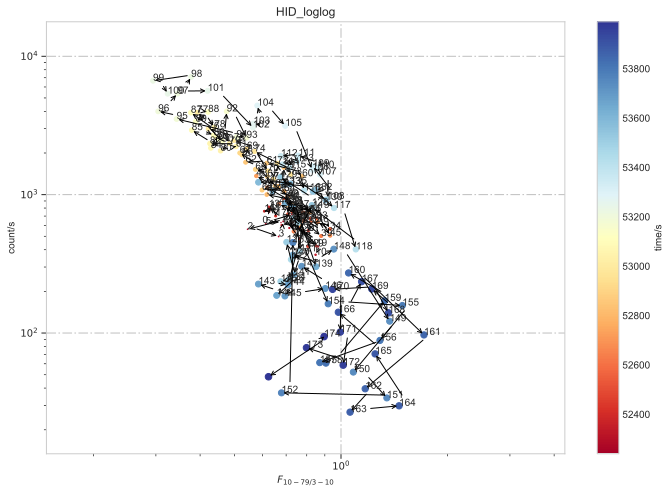

In [24]:
hardratiopartcount,countratepartcount,timepartcount=get_hardratio_depend_time_count(hardratiotot2,counttot2,timetot2,timemin=52000,timemax=54000,countmin=1,countmax=10000)
cm=plt.cm.get_cmap('RdYlBu')
#cm=plt.cm.get_cmap('Greys')
plt.figure(figsize=(10,6))
ax=plt.subplot(111)
setup(ax)

#plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,s=np.arange(len(timepartcount)),linewidths=np.arange(len(timepartcount)),cmap=cm,marker='.')
plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,s=np.arange(len(timepartcount)),cmap=cm,marker='.')

for i,(x_,y_,z_) in enumerate(zip(hardratiopartcount[:-1],countratepartcount[:-1],timepartcount[:-1])):
    #plt.scatter(x_,y_,c=z_,s=i,linewidths=i,cmap=cm,marker='.')
    plt.annotate(i,xy=(hardratiopartcount[i+1],countratepartcount[i+1]),xytext=(x_,y_),arrowprops=dict(arrowstyle="->"))#arrowprops=dict(facecolor='black', shrink=0.05)
plt.xlim(min(hardratiopartcount)*0.5,max(hardratiopartcount)*2.5)
plt.ylim(min(countratepartcount)*0.5,max(countratepartcount)*2.5)
plt.xscale('log')
plt.yscale('log')
#plt.semilogx()
#plt.semilogy()
plt.grid(True,color='grey',linestyle='-.',linewidth=1,alpha=0.5)
plt.title('HID_loglog')
#plt.xticks(np.logspace(min(hardratiopartcount),max(hardratiopartcount),10),rotation=30)
#plt.yticks(np.logspace(min(countratepartcount),max(countratepartcount),10),rotation=30)

#ax.yaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
#ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",fontsize=15, transform=ax.transAxes)
#plt.gca().yaxis.set_major_locator(ticker.LogLocator(10.0,numticks=1))
#plt.gca().xaxis.set_minor_locator(ticker.LogLocator(0.1))
#plt.gca().yaxis.set_minor_locator(ticker.LogLocator(0.1))
plt.tight_layout()
plt.xlabel('$F_{{10-79}/{3-10}}$')
plt.ylabel('count/s')
plt.colorbar(label='time/s')
#plt.text=(x,y,'words')
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.savefig('high_state_HID_updown.png')
#plt.show()
#plt.grid()
#plt.savefig('/Users/brettlv/Desktop/hid2_10s.png')

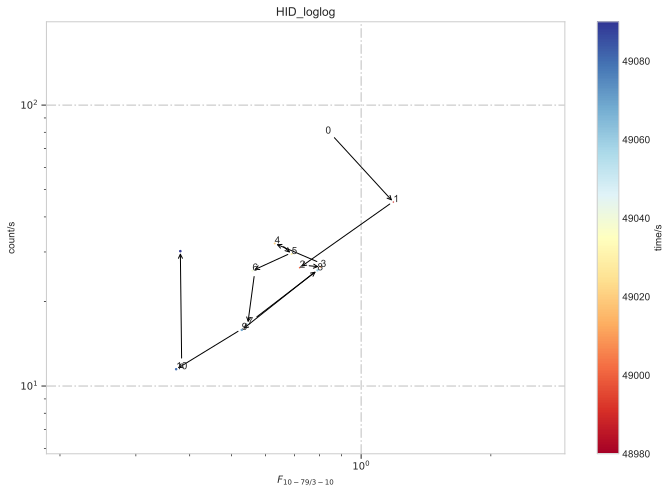

In [25]:
hardratiopartcount,countratepartcount,timepartcount=get_hardratio_depend_time_count(hardratiotot2,counttot2,timetot2,timemin=48500,timemax=49500,countmin=1,countmax=100)
cm=plt.cm.get_cmap('RdYlBu')
#cm=plt.cm.get_cmap('Greys')
plt.figure(figsize=(10,6))
ax=plt.subplot(111)
setup(ax)

#plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,s=np.arange(len(timepartcount)),linewidths=np.arange(len(timepartcount)),cmap=cm,marker='.')
plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,s=np.arange(len(timepartcount)),cmap=cm,marker='.')

for i,(x_,y_,z_) in enumerate(zip(hardratiopartcount[:-1],countratepartcount[:-1],timepartcount[:-1])):
    #plt.scatter(x_,y_,c=z_,s=i,linewidths=i,cmap=cm,marker='.')
    plt.annotate(i,xy=(hardratiopartcount[i+1],countratepartcount[i+1]),xytext=(x_,y_),arrowprops=dict(arrowstyle="->"))#arrowprops=dict(facecolor='black', shrink=0.05)
plt.xlim(min(hardratiopartcount)*0.5,max(hardratiopartcount)*2.5)
plt.ylim(min(countratepartcount)*0.5,max(countratepartcount)*2.5)
plt.xscale('log')
plt.yscale('log')
#plt.semilogx()
#plt.semilogy()
plt.grid(True,color='grey',linestyle='-.',linewidth=1,alpha=0.5)
plt.title('HID_loglog')
#plt.xticks(np.logspace(min(hardratiopartcount),max(hardratiopartcount),10),rotation=30)
#plt.yticks(np.logspace(min(countratepartcount),max(countratepartcount),10),rotation=30)

#ax.yaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
#ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",fontsize=15, transform=ax.transAxes)
#plt.gca().yaxis.set_major_locator(ticker.LogLocator(10.0,numticks=1))
#plt.gca().xaxis.set_minor_locator(ticker.LogLocator(0.1))
#plt.gca().yaxis.set_minor_locator(ticker.LogLocator(0.1))
plt.tight_layout()
plt.xlabel('$F_{{10-79}/{3-10}}$')
plt.ylabel('count/s')
plt.colorbar(label='time/s')
#plt.text=(x,y,'words')
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.savefig('mid_state_HID_downup.png')
#plt.show()
#plt.grid()
#plt.savefig('/Users/brettlv/Desktop/hid2_10s.png')

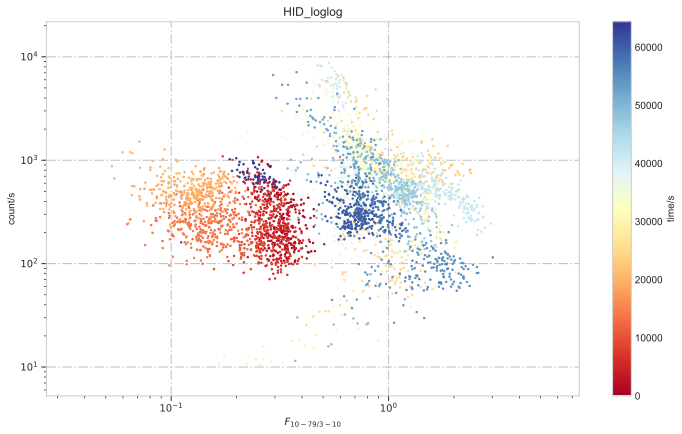

In [18]:
hardratiopartcount,countratepartcount,timepartcount=get_hardratio_depend_time_count(hardratiotot2,counttot2,timetot2,timemin=timetot2[0],timemax=timetot2[-1],countmin=1,countmax=10000)
cm=plt.cm.get_cmap('RdYlBu')
#cm=plt.cm.get_cmap('Greys')
plt.figure(figsize=(10,6))
ax=plt.subplot(111)
setup(ax)

#plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,s=np.arange(len(timepartcount)),linewidths=np.arange(len(timepartcount)),cmap=cm,marker='.')
#plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,s=np.arange(len(timepartcount)),cmap=cm,marker='.')
plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,s=10,cmap=cm,marker='.')
plt.xlim(min(hardratiopartcount)*0.5,max(hardratiopartcount)*2.5)
plt.ylim(min(countratepartcount)*0.5,max(countratepartcount)*2.5)
plt.xscale('log')
plt.yscale('log')
#plt.semilogx()
#plt.semilogy()
plt.grid(True,color='grey',linestyle='-.',linewidth=1,alpha=0.5)
plt.title('HID_loglog')
#plt.xticks(np.logspace(min(hardratiopartcount),max(hardratiopartcount),10),rotation=30)
#plt.yticks(np.logspace(min(countratepartcount),max(countratepartcount),10),rotation=30)

#ax.yaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
#ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",fontsize=15, transform=ax.transAxes)
#plt.gca().yaxis.set_major_locator(ticker.LogLocator(10.0,numticks=1))
#plt.gca().xaxis.set_minor_locator(ticker.LogLocator(0.1))
#plt.gca().yaxis.set_minor_locator(ticker.LogLocator(0.1))
plt.tight_layout()
plt.xlabel('$F_{{10-79}/{3-10}}$')
plt.ylabel('count/s')
plt.colorbar(label='time/s')
#plt.text=(x,y,'words')
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
#plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.savefig('total_HID.png',dpi=300)
#plt.show()
#plt.grid()
#plt.savefig('/Users/brettlv/Desktop/hid2_10s.png')

/Users/brettlv/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


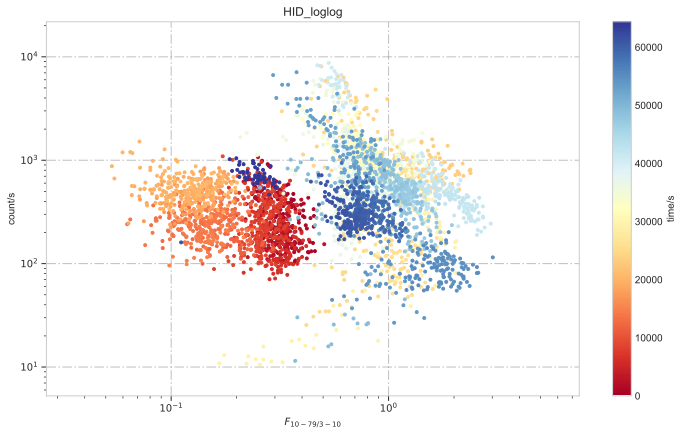

In [19]:
hardratiopartcount,countratepartcount,timepartcount=get_hardratio_depend_time_count(hardratiotot2,counttot2,timetot2,timemin=timetot2[0],timemax=timetot2[-1],countmin=1,countmax=10000)
cm=plt.cm.get_cmap('RdYlBu')
#cm=plt.cm.get_cmap('Greys')
plt.figure(figsize=(10,6))
ax=plt.subplot(111)
setup(ax)

#plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,s=np.arange(len(timepartcount)),linewidths=np.arange(len(timepartcount)),cmap=cm,marker='.')
#plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,s=np.arange(len(timepartcount)),cmap=cm,marker='.')
plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,cmap=cm,marker='.')
plt.xlim(min(hardratiopartcount)*0.5,max(hardratiopartcount)*2.5)
plt.ylim(min(countratepartcount)*0.5,max(countratepartcount)*2.5)
plt.xscale('log')
plt.yscale('log')
#plt.semilogx()
#plt.semilogy()
plt.grid(True,color='grey',linestyle='-.',linewidth=1,alpha=0.5)
plt.title('HID_loglog')
#plt.xticks(np.logspace(min(hardratiopartcount),max(hardratiopartcount),10),rotation=30)
#plt.yticks(np.logspace(min(countratepartcount),max(countratepartcount),10),rotation=30)

#ax.yaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
#ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",fontsize=15, transform=ax.transAxes)
#plt.gca().yaxis.set_major_locator(ticker.LogLocator(10.0,numticks=1))
#plt.gca().xaxis.set_minor_locator(ticker.LogLocator(0.1))
#plt.gca().yaxis.set_minor_locator(ticker.LogLocator(0.1)
plt.tight_layout()
plt.xlabel('$F_{{10-79}/{3-10}}$')
plt.ylabel('count/s')
plt.colorbar(label='time/s')
plt.legend()
#plt.text=(x,y,'words')
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
#plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.savefig('total_HID_1.png',dpi=300)
#plt.show()
#plt.grid()
#plt.savefig('/Users/brettlv/Desktop/hid2_10s.png')

In [28]:
counttot3[:10],countlow3[:10],counthigh3[:10]

(array([ 1090.36560059,  1016.67840576,  1167.40576172,  1043.38952637,
         1119.31665039,  1021.63372803,   903.07873535,  1133.5480957 ,
         1194.39929199,  1265.62597656], dtype=float32),
 array([  898.54833984,   848.69451904,  1027.19909668,   899.5848999 ,
          979.04785156,   875.01654053,   745.71057129,   988.82507324,
         1043.78149414,  1133.36096191], dtype=float32),
 array([ 193.17767334,  169.86427307,  140.94470215,  143.80461121,
         141.68565369,  146.61715698,  157.36817932,  144.72299194,
         152.12399292,  137.01707458], dtype=float32))

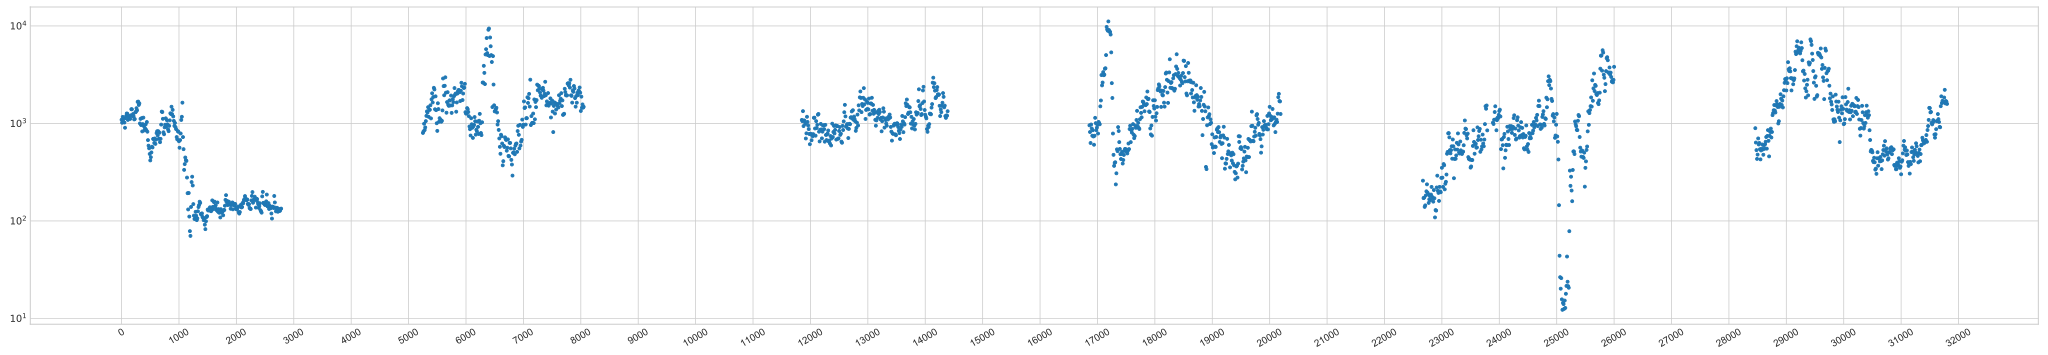

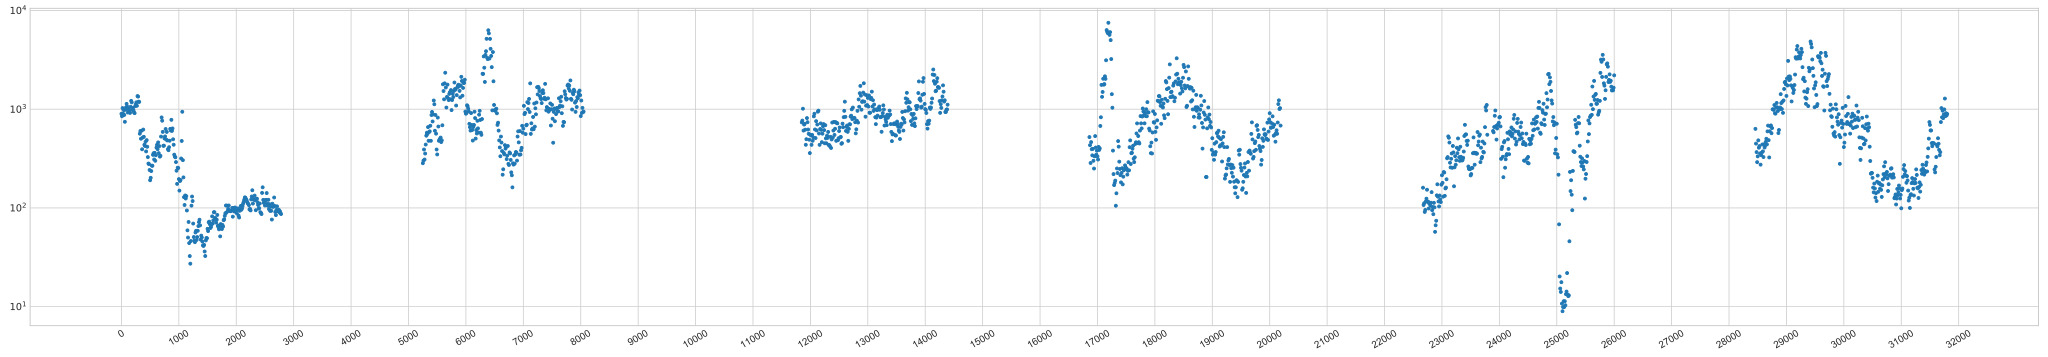

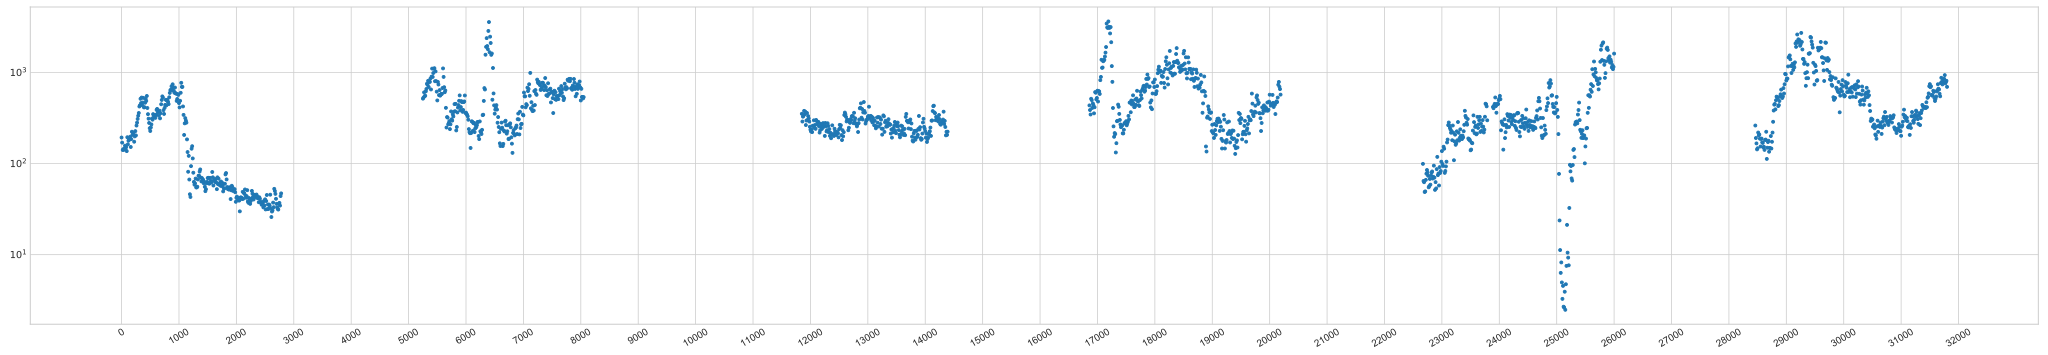

In [27]:
path3='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/nustar_v404/90102007003/grp_pipeline_products_10s/V404cygA01_sr.lc'
timetot3,counttot3,obstimetot3,tstart3=get_lc_path(path3)
path3='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/nustar_v404/90102007003/grp_pipeline_products_10s_3_10/V404cygA01_sr.lc'
timelow3,countlow3,obstimelow3,tstart=get_lc_path(path3)
path3='/Volumes/Seagate_Backup_Plus_Drive_Lvb/V404cyg/nustar_v404/90102007003/grp_pipeline_products_10s_10_79/V404cygA01_sr.lc'
timehigh3,counthigh3,obstimehigh3,tstart=get_lc_path(path3)
hardratiotot3=counthigh3/countlow3

/Users/brettlv/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


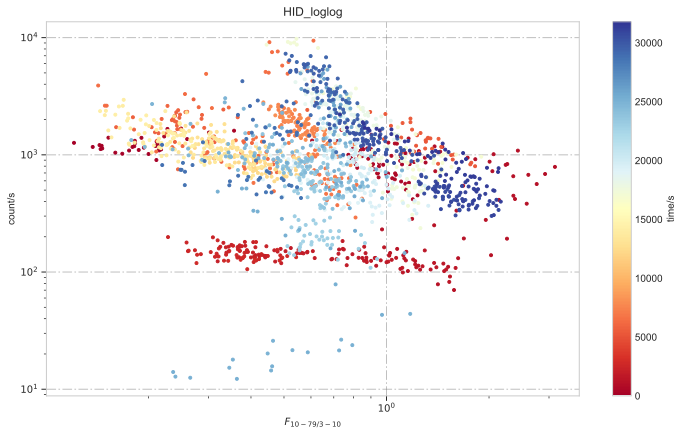

In [29]:
hardratiopartcount,countratepartcount,timepartcount=get_hardratio_depend_time_count(hardratiotot3,counttot3,timetot3,timemin=timetot3[0],timemax=timetot3[-1],countmin=1,countmax=10000)
cm=plt.cm.get_cmap('RdYlBu')
#cm=plt.cm.get_cmap('Greys')
plt.figure(figsize=(10,6))
ax=plt.subplot(111)
setup(ax)

#plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,s=np.arange(len(timepartcount)),linewidths=np.arange(len(timepartcount)),cmap=cm,marker='.')
#plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,s=np.arange(len(timepartcount)),cmap=cm,marker='.')
plt.scatter(hardratiopartcount,countratepartcount,c=timepartcount,cmap=cm,marker='.')
#plt.xlim(min(hardratiopartcount)*0.5,max(hardratiopartcount)*2.5)
#plt.ylim(min(countratepartcount)*0.5,max(countratepartcount)*2.5)
plt.xscale('log')
plt.yscale('log')
#plt.semilogx()
#plt.semilogy()
plt.grid(True,color='grey',linestyle='-.',linewidth=1,alpha=0.5)
plt.title('HID_loglog')
#plt.xticks(np.logspace(min(hardratiopartcount),max(hardratiopartcount),10),rotation=30)
#plt.yticks(np.logspace(min(countratepartcount),max(countratepartcount),10),rotation=30)

#ax.yaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
#ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",fontsize=15, transform=ax.transAxes)
#plt.gca().yaxis.set_major_locator(ticker.LogLocator(10.0,numticks=1))
#plt.gca().xaxis.set_minor_locator(ticker.LogLocator(0.1))
#plt.gca().yaxis.set_minor_locator(ticker.LogLocator(0.1)
plt.tight_layout()
plt.xlabel('$F_{{10-79}/{3-10}}$')
plt.ylabel('count/s')
plt.colorbar(label='time/s')
plt.legend()
#plt.text=(x,y,'words')
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
#plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.savefig('total_HID_3.png',dpi=300)
#plt.show()
#plt.grid()
#plt.savefig('/Users/brettlv/Desktop/hid2_10s.png')